<a href="https://colab.research.google.com/github/babuush/DE281/blob/main/optimization_using_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1D function optimization

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [7]:
# objective function
f1 = lambda x: (x - 1) ** 4 + x ** 2

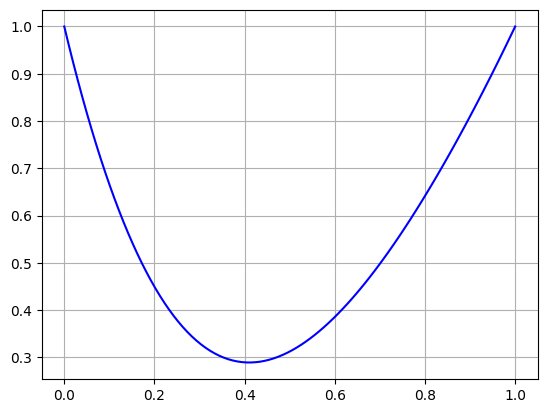

In [8]:
# plot curve
x = np.linspace(0, 1, 100)
y = [f1(val) for val in x]
plt.plot(x, y, color='blue', label='f1')
plt.grid()

In [9]:
from scipy import optimize
from scipy.optimize import minimize_scalar

In [10]:
res = minimize_scalar(f1, method='brent')
print(f'minimizer x = {res.x:.02f}, minimum value= {res.fun:.02f}, iteration= {res.nit}')

minimizer x = 0.41, minimum value= 0.29, iteration= 12


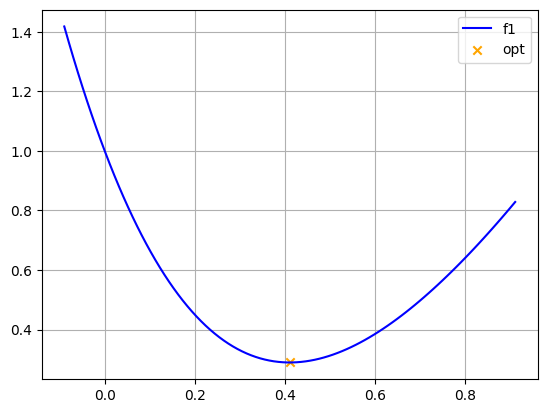

In [11]:
# plot curve
x = np.linspace(res.x - 0.5, res.x + 0.5, 100)
y = [f1(val) for val in x]
plt.plot(x, y, color='blue', label='f1')

# plot optima
plt.scatter(res.x, res.fun, color='orange', marker='x', label='opt')

plt.grid()
plt.legend(loc=1)

In [13]:
from scipy import optimize
from scipy.optimize import minimize_scalar

minimize_scalar(f1, method='golden', options={'disp': True})


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol = 1.4901161193847656e-08 )


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.4901161193847656e-08 )
 success: True
     fun: 0.28927342393777794
       x: 0.4102454851343983
     nit: 40
    nfev: 45

In [14]:
minimize_scalar(f1, method='golden', bracket=(0, 2), options={'disp': True})


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol = 1.4901161193847656e-08 )


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.4901161193847656e-08 )
 success: True
     fun: 0.28927342393777794
       x: 0.41024548863229215
     nit: 42
    nfev: 47

In [15]:
minimize_scalar(f1, bounds=(0, 1), method='bounded', options={'disp': True})


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


 message: Solution found.
 success: True
  status: 0
     fun: 0.28927342393777816
       x: 0.41024549602414084
     nit: 9
    nfev: 9

In [ ]:
# extra example



# 2D function optimization

## utility function

In [16]:
def plot_iterations(f, iterations, delta=0.1, box=1):
    xs = np.arange(-box, +box, delta)
    ys = np.arange(-box, +box, delta)
    X, Y = np.meshgrid(xs, ys)
    # create function mesh
    Z = np.array([[f(np.array([x, y])) for x in xs] for y in ys])
    # contour plot
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    cd = ax.contour(X, Y, Z)
    # error plot
    ax.clabel(cd, inline=1, fontsize=10)
    ax.plot(iterations[:, 0], iterations[:, 1], color='red', marker='x', label='opt')
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(range(len(iterations)), [f(np.array(step)) for step in iterations], 'xb-')
    ax.grid('on')
    ax.set_xlabel('iteration')
    ax.set_xticks(range(len(iterations)))
    ax.set_ylabel('f(x)')


# specify callback function
def get_callback_function(data_list):
    def callback_function(x):
        data_list.append(x)

    return callback_function

In [17]:
from scipy.optimize import minimize

In [18]:
#  objective function
f2 = lambda x: 2 * x[0] ** 2 + 5 * x[1] ** 2
#f2 = lambda x : -1*2*x[0]*x[1]-2*x[1]+x[0]**2+2*x[1]**2

## CG (conjugate gradient)

In [19]:
x0 = [-1, 1]
minimize(f2, x0, method='CG', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.2618737554866135e-16
       x: [-2.181e-09 -4.831e-09]
     nit: 3
     jac: [ 2.108e-08  2.620e-08]
    nfev: 18
    njev: 6

In [20]:
# use utility function
import numpy as np

x0 = [-1, 1]
cg_data = [np.array(x0)]
minimize(f2, x0, method='CG', callback=get_callback_function(cg_data), options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.2618737554866135e-16
       x: [-2.181e-09 -4.831e-09]
     nit: 3
     jac: [ 2.108e-08  2.620e-08]
    nfev: 18
    njev: 6

In [21]:
cg_data

[array([-1,  1]),
 array([-0.62489542,  0.06223854]),
 array([-0.05031551, -0.08082948]),
 array([-2.18099026e-09, -4.83060945e-09])]

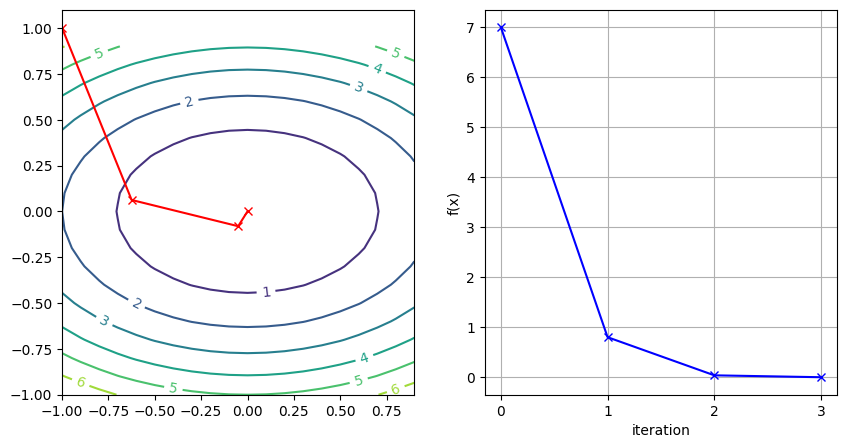

In [22]:
plot_iterations(f2, np.array(cg_data))

In [23]:
fprime = lambda x: optimize.approx_fprime(x, f2)
x0 = [-1, 1]
ncg_data = [np.array(x0)]
minimize(f2, x0, method='Newton-CG', jac=fprime, callback=get_callback_function(ncg_data))

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.885780604738921e-16
       x: [-7.451e-09 -7.451e-09]
     nit: 7
     jac: [-8.036e-07  3.873e-07]
    nfev: 8
    njev: 19
    nhev: 0

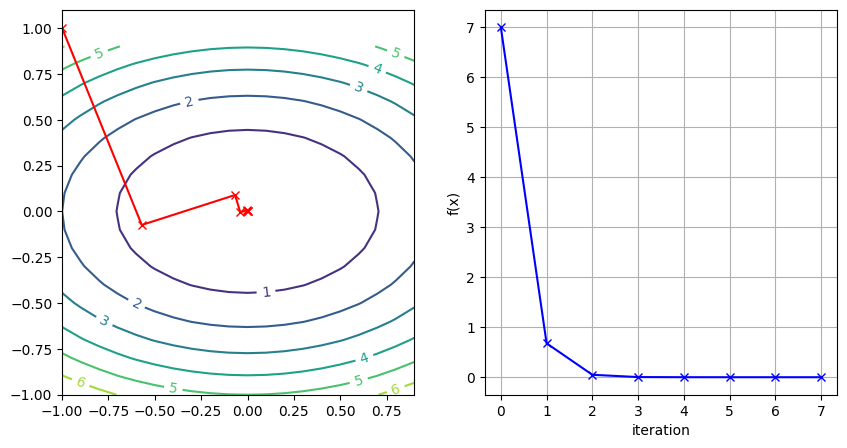

In [24]:
plot_iterations(f2, np.array(ncg_data))

## fail case

In [25]:
#  objective function
f3 = lambda x: -1 * 2 * x[0] * x[1] - 2 * x[1] + x[0] ** 2 + 2 * x[1] ** 2

In [26]:
x0 = [0, -1]
minimize(f3, x0, method='CG', options={'disp': True})

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 13
         Function evaluations: 60
         Gradient evaluations: 20


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.9999999999971438
       x: [ 1.000e+00  1.000e+00]
     nit: 13
     jac: [-8.643e-07 -2.369e-06]
    nfev: 60
    njev: 20

In [27]:
fprime = lambda x: optimize.approx_fprime(x, f3)
x0 = [0, -1]
ncg_data = [np.array(x0)]
minimize(f3, x0, method='Newton-CG', jac=fprime, callback=get_callback_function(ncg_data))

 message: Warning: CG iterations didn't converge. The Hessian is not positive definite.
 success: False
  status: 3
     fun: -0.9935961451410231
       x: [ 9.138e-01  9.936e-01]
     nit: 3
     jac: [-8.264e-02 -1.331e-01]
    nfev: 4
    njev: 88
    nhev: 0

In [28]:
minimize(f3, x0, method='Powell', callback=get_callback_function(ncg_data))

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1.0000000000000004
       x: [ 1.000e+00  1.000e+00]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.000e+00  5.000e-01]]
    nfev: 100

In [29]:
ncg_data

[array([ 0, -1]),
 array([-0.4       ,  0.19999999]),
 array([0.85082388, 0.89214221]),
 array([0.91381018, 0.99357601]),
 array([-1.,  0.]),
 array([-2.22044605e-16,  5.00000000e-01]),
 array([1.00000001, 1.        ])]